In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np

#### Data generation

In [30]:
intercept = 0.5
n_list = [50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
L = 100

In [31]:
def generate_data(n, beta_coefs, intercept):
    """
    function to generate data following the instructions
    
    Args:
        n(int): number of observations
        beta_coefs(np.array): array of beta coefficients
        intercept(float): given intercept
    
    Returns:
        data: matrix with observations
        labels: class for each observation
    """
    n_var = len(beta_coefs)
    data = np.zeros((n, n_var))
    labels = np.zeros((n))

    for row in range(n):
        x_list = [np.random.normal() for _ in range(n_var)]
        data[row] = np.array(x_list)
        denominator = [x * beta for x, beta in zip(x_list, beta_coefs)]
        denominator.insert(0, intercept)
        p = 1 / (1 + (np.exp(-(sum(denominator)))))
        y = np.random.binomial(n=1, p=p)
        labels[row] = y
        
    return data, labels

#### Experiment

In [32]:
def experiment(intercept, n_var):
    """
    function to perform an experiment
    
    Args:
        intercept(float): given intercept
        n_var(int): number of variables in model
        
    Returns:
        mse_lst(list): list of list with MSE error per every model in every run configuration
    """
    mse_lst = []
    beta_coefs = [1] * n_var
    for n in n_list:
        mse_local = []
        for _ in range(L):
            X, y = generate_data(n, beta_coefs, intercept)
            model = LogisticRegression(penalty='l2') # C = 1000
            model.fit(X, y)
            mse_local.append(mean_squared_error(beta_coefs, model.coef_[0]))
        mse_lst.append(mse_local)
    return mse_lst

#### Calculate MSE for 5 variables

In [33]:
mse_lst_5 = experiment(intercept, 5)

#### Calculate MSE for 3 variables

In [34]:
mse_lst_3 = experiment(intercept, 3)

#### Calculate avergae MSE for every `n` 

In [35]:
def count_avg_mse(mse_lst):
    """
    function to caluclate average MSE per every experiment
    
    Args:
        mse_lst(list): list with MSE error per every model in every run configuration
        
    Returns:
        list with avergae MSE error per observations
    """
    return [np.mean(mse_sublist) for mse_sublist in mse_lst]

#### Visualisation

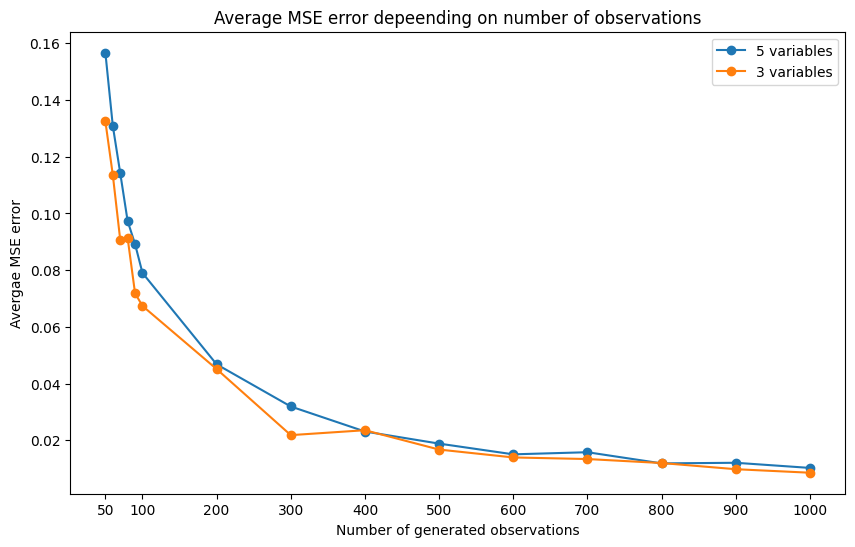

In [36]:
plt.figure(figsize=(10, 6)) 

plt.plot(n_list, count_avg_mse(mse_lst_5), label='5 variables', marker='o')
plt.plot(n_list, count_avg_mse(mse_lst_3), label='3 variables', marker='o')

plt.xlabel("Number of generated observations")
plt.ylabel("Avergae MSE error")
plt.title("Average MSE error depeending on number of observations")

plt.xticks([50] + list(range(100, 1100, 100)))

plt.legend()
plt.show()